In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data to data frame and check dataset
ad_data = pd.read_csv('advertising.csv')
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# **Exploring Dataset**

In [3]:
# Summary information
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
#Statistical info
ad_data.describe()

In [4]:
# Check missing values
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

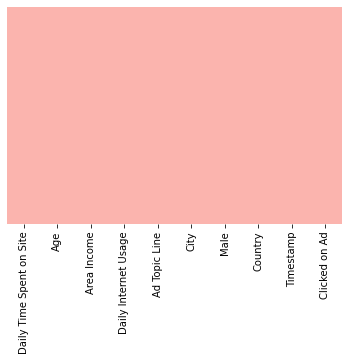

In [5]:
# Checking missing values using heatmap
sns.heatmap(ad_data.isnull(), cbar=False, cmap='Pastel1', yticklabels=False)

***Treating object variables***

There are 4 columns contain datatype as object 'Country','City','Timestamp','Ad Topic Line'. After observe the data information, these columns may not worth to keep for this analysis. 

In [6]:
ad_data["Timestamp"].value_counts()

2016-04-27 18:25:30    1
2016-04-19 05:15:28    1
2016-03-18 13:22:35    1
2016-01-13 02:39:00    1
2016-01-26 15:56:55    1
                      ..
2016-06-18 17:23:26    1
2016-07-17 01:58:53    1
2016-02-28 06:41:44    1
2016-07-03 09:22:30    1
2016-03-27 08:32:37    1
Name: Timestamp, Length: 1000, dtype: int64

In [7]:
ad_data["City"].value_counts()

Williamsport       3
Lisamouth          3
West Steven        2
Wrightburgh        2
West Shannon       2
                  ..
Millerchester      1
Port Joshuafort    1
East Eric          1
West Lucas         1
Harveyport         1
Name: City, Length: 969, dtype: int64

In [8]:
ad_data["Country"].value_counts()

France              9
Czech Republic      9
Senegal             8
Greece              8
Turkey              8
                   ..
Marshall Islands    1
Mozambique          1
Romania             1
Slovenia            1
Aruba               1
Name: Country, Length: 237, dtype: int64

In [9]:
ad_data["Ad Topic Line"].value_counts()

Virtual 5thgeneration neural-net                1
Self-enabling tertiary challenge                1
Fully-configurable foreground solution          1
User-friendly impactful time-frame              1
Triple-buffered demand-driven alliance          1
                                               ..
Balanced discrete approach                      1
Universal empowering adapter                    1
Fully-configurable clear-thinking throughput    1
Innovative user-facing extranet                 1
Open-architected web-enabled benchmark          1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [10]:
# Dropping columns contain object type
ad_data.drop(['Ad Topic Line','City','Country','Timestamp'], axis=1, inplace=True)
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


# **Visualization**

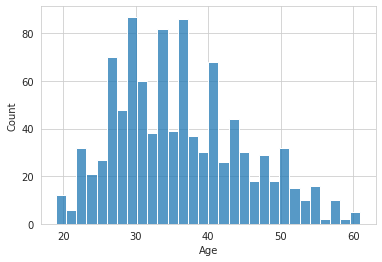

In [11]:
#Create a histogram of the 'Age'
sns.set_style('whitegrid')
sns.histplot(x='Age', data=ad_data, bins=30)

***Observation comment***

Based on histogram observation, the distribution of the age of customer (in year) range from 20 - 60 years old. The majority customers are around 30 - 35 years old. The histogram seems like skewed right a little.

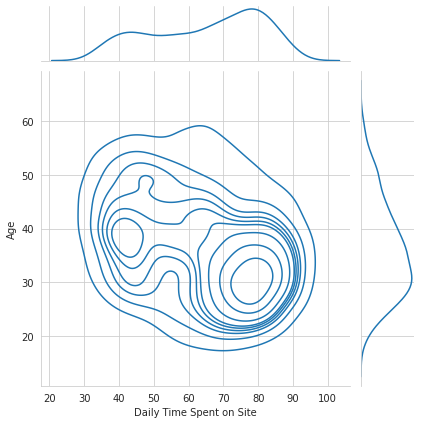

In [12]:
#Create a jointplot showing the kde distributions of 'Daily Time Spent on Site' vs. 'Age'
sns.jointplot(x='Daily Time Spent on Site', y= 'Age', data=ad_data, kind='kde')

***Observation comment***

The highest Daily time spent on Site is avgeragely 70-80 minutes per day.
As mentioned earlier, majority customers spend time on site are 30-35 years old.


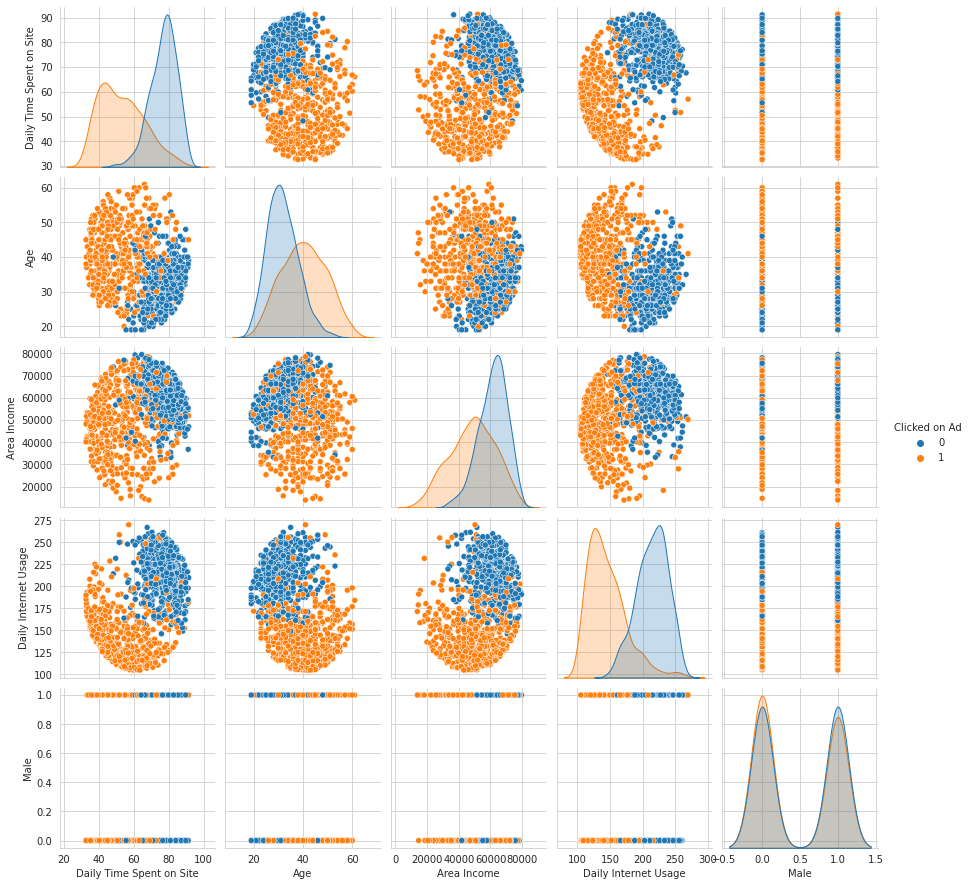

In [13]:
# Create a pairplot with the hue defined by the 'Clicked on Ad' column feature
sns.pairplot(data=ad_data, hue='Clicked on Ad')

***Observation comment***

* Consumers with age above 30 years old have tendency of clicking on ads more 
than younger democratic. 

* Consumers spent less than averagely 200 minutes a day on the internet have tendency of clicking on ads. 

* Consumers who area income less than around 50K have tendency of clicking on ad.
Both male and female have tendency of clicking on the ad. 

# **Building Logistic Regression Model**

In [30]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

In [31]:
x = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']].values
y = ad_data[['Clicked on Ad']].values

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

In [35]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='liblinear')

In [36]:
# fit model on only train. Classification 
clf = lm.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
predictions = clf.predict(x_test)
print(predictions)

[1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0
 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1
 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0
 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1]


In [ ]:
# predictions is computed using probabilities calculation
prob = clf.predict_proba(x_test)
print(prob)

# **Evaluate the Classification Model**

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [48]:
# y_test is the true values
print(metrics.confusion_matrix(y_test, predictions))

[[151  10]
 [ 31 138]]


0: didn't click on ad, 1 clicked on ad

True Postives (TP): 138

True Negatives (TN): 151

False Postitive (FP): 10, Type I error, Falsely predict postive

False Negative (FN): 31, Type II error, Falsely predict negative

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)
plt.show()  

In [41]:
# printing classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       161
           1       0.93      0.82      0.87       169

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330



## ***Result interpretation***

Accuracy of the classifier is 88%. This result shows the accuracy of model performance is pretty good. 

Precision is the ability of a classifier not to label an instance postive that is actually negative. Other word, this rate show how often is the precidiction is correct. In this case, we have precision of 83% for not clicked on the ad and 93% for clicked on ad. Both of the precision rates for 0 and 1 have pretty high rate in prediction correctness.

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. In this case the Recall rate for 0 is 94% and 1 is 82%. Both of them were selected with high rate of relevant items to be evaluate.

Precision and Recall rates from both of the 0 and 1 are reverse when we compare both of the metrics altogether (One has better recall and the other one has better precision). However the differences between results aren't much different from each other +/- 10%. 

We can take a look on f1 score. F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 0 has f1 score of 0.88 and 1 has f1 score as 0.87. The values of f1 score in this case somewhat similar to each other and close to 1. 

Overall, Precision and Recall results are close to the accuracy score, and all of the scores are pretty high (but not overfitting), therefore, this model performance is pretty good. 

How to improve the model: 

To me the model's performance is good enough, however, if it wasn't, there are couple ways to improve the model. The easiest method is to increase the data size 

To boost the recall is to increase the number of samples that you define as predicted postive by lowering the threshold for predicted positive. But this may also increase the number of false positives.